# Dataset

In [1]:
!pip install torch
!pip install tokenizers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.7 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os                                     
import google.colab                           
                                   
# mounting Google Drive in the runtime's virtual machine

if not os.path.isdir('/content/drive'):

    google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# # For barkat
# test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangla Bert/Dataset/dataset/Test.csv')
# train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangla Bert/Dataset/dataset/Train.csv')
# val_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bangla Bert/Dataset/dataset/Val.csv')

FileNotFoundError: ignored

In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/Research with Fahad Sir/Dataset/dataset/Test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Research with Fahad Sir/Dataset/dataset/Train.csv')
val_data = pd.read_csv('/content/drive/MyDrive/Research with Fahad Sir/Dataset/dataset/Val.csv')

In [6]:
train_data 

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2


In [7]:
positive_train_data = train_data[train_data['Label'] == 1] 
negative_train_data = train_data[train_data['Label'] == 0] 
neutral_train_data = train_data[train_data['Label'] == 2] 

In [8]:
positive_train_data

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
7,"সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চ...",1
11,আচ্ছা চারপাশে অন্ধকার কেন ? লাইট টা শুধু আপনাদ...,1
...,...,...
12565,সারা বাংলাদেশের মানুষের একটা দাবি ভুয়া লটারি ক...,1
12567,অনেক সুন্দর রাস্তা দার্জিলিয়ের যা এখন পর্যন্ত ...,1
12569,জত দিন জাচ্ছে তত আপনাদের ভিডিও বের হচ্ছে দেখে ...,1
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1


In [9]:
negative_train_data

,Data,Label
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
5,"যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানি...",0
8,আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গাল...,0
9,"তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার",0
40,ডিপেন্ড করে আপনার লাইফ স্টাইলের উপর । পার হেড ...,0
...,...,...
12557,ঘটনা এখানেই সেস । নতুন কোন নাটক দেখতে মুড়ি খান,0
12559,ফাহিম ভাই সব কিছুর দামটা ইসকিনে দেখা বেন পিলিজ,0
12561,কোথায় কতো টাকা লাগবে সেইটা টুরের আগেই কি করে ব...,0
12566,ডিসেমবরে শেষের দিকে গেলে বরফ পাবো দাদা,0


In [10]:
neutral_train_data

,Data,Label
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
6,বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআ...,2
10,লেসবো মেয়েটার ফ্রেন্ড টা অনেক কিউট,2
14,সাধারন মানুষ কি অন্যাই কাজ করে । সব করে রাজনীত...,2
15,ভাই দয়াকরে খাবার নষ্ট করবেন্না,2
...,...,...
12563,"বেটা ভালো কিছু শিখ , বিধর্মি দের এসব কপি করে ক...",2
12564,"মানুষ অতিষ্ঠ হয়েছে , কিন্তু তারপরও থানায় যেয়ে ...",2
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2


In [11]:
test_data.head()

,Data,Label
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0
1,ভাইয়া নতুন ভিডিও আসে না কেন,0
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1


In [12]:
val_data.head()

,Data,Label
0,আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে,1
1,ভাই আমাদের আগের মেয়র আনিচুল হক নাই যে আমাদের ক...,2
2,আমি মার্ক ওয়েন আর সনির বিশাল ভক্ত । একটা সময় ভ...,1
3,৩ মাস না যেতেই একেকজন ফুলে ফেপে আলুর দম,2
4,"বাংলাদেশের পুলিশ হলো নিরীহ মানুষের যম , আর অত্...",2


# Analysis Words

In [13]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [14]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [15]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [16]:
positive_corpus = create_corpus(positive_train_data.Data[:1000])
print("Total positive tokens in 1000", len(positive_corpus))

negative_corpus = create_corpus(negative_train_data.Data[:1000])
print("Total negative tokens in 1000", len(negative_corpus))

neutral_corpus = create_corpus(neutral_train_data.Data[:1000])
print("Total neutral tokens in 1000", len(neutral_corpus))

Total positive tokens in 1000 15609
Total negative tokens in 1000 13306
Total neutral tokens in 1000 16267


In [17]:
from matplotlib import font_manager
# set font
# font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [18]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm


def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'অনেক', 'আপনার', 'করে', 'জন্য', 'আমি', 'আমার', 'এই', 'আর', 'থেকে', 'কি', 'আপনি', 'খুব', 'এর', 'আছে', 'সব', 'ও', 'আমাদের', 'হয়', 'হবে')
(200, 150, 144, 124, 116, 113, 108, 107, 106, 87, 72, 72, 69, 66, 64, 63, 59, 58, 56, 53)


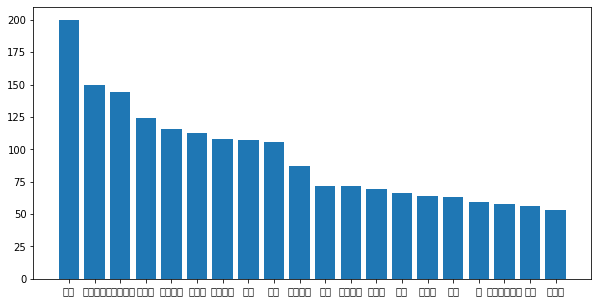

In [19]:
show_stop_words(positive_corpus)

('না', 'কি', 'আর', 'করে', 'আমি', 'হয়', 'থেকে', 'এই', 'হবে', 'করা', 'আমার', 'এর', 'আপনার', 'সব', 'তো', 'এটা', 'কোন', 'কে', 'যে', 'মনে')
(405, 114, 97, 93, 92, 87, 79, 72, 66, 65, 63, 61, 54, 52, 52, 50, 50, 48, 48, 46)


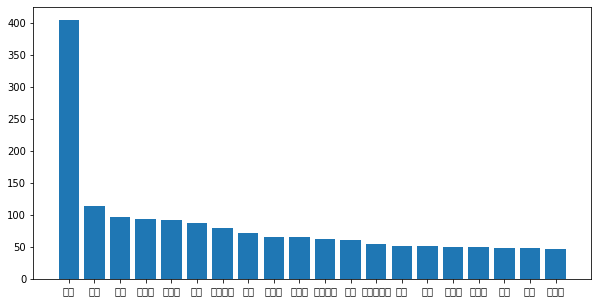

In [20]:
show_stop_words(negative_corpus)

('না', 'এই', 'আর', 'কি', 'করে', 'হয়', 'তো', 'সব', 'জন্য', 'থেকে', 'কে', 'হবে', 'এর', 'কোন', 'কিছু', 'আছে', 'মনে', 'করা', 'নাই', 'ও')
(458, 184, 168, 157, 157, 109, 88, 84, 74, 71, 69, 67, 66, 64, 60, 59, 58, 56, 55, 52)


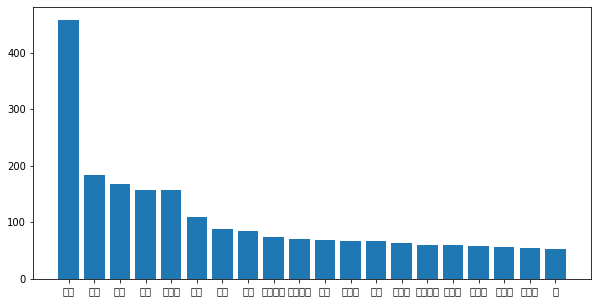

In [21]:
show_stop_words(neutral_corpus)

# Classify

In [22]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [23]:
class BanglaDataSet(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data
        
        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        # return value['head']+"[SEP]"+value['con'] , value['label']
        return value['Data'] , value['Label']

In [24]:
df = positive_train_data[:negative_train_data.shape[0]* 2]
df = df.append(negative_train_data)
df = df.sample(frac=1).reset_index(drop=True)
len(df)

8027

In [25]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits

btokenizer = BasicTokenizer()

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

print("********** Before ***************")
text = df.iloc[1]['Data']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
পাঁচ জনকে দেখে অনেক ভালো লাগল আমি ফাহিম ভাই চেলানের সদস্য

********** After ***************
পাঁচ ভালো লাগল ফাহিম ভাই চেলানের সদস্য


In [26]:
df['Data'] = df.Data.apply(clean_text)

In [27]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=121, stratify=df['Label'])

In [28]:
len(train_df), len(test_df)

(6421, 1606)

In [29]:
training_data = BanglaDataSet(train_df)
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

In [30]:
test_data = BanglaDataSet(test_df)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

# Define Model

In [31]:
class SentimentBert(nn.Module):

    def __init__(self, bert):
        super(SentimentBert, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 128)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(128, 2)  

    # define the forward pass
    def forward(self, input_ids, token_type_ids, attention_mask):
        # pass the inputs to the model
        out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        x = self.fc1(out[1])
        x = self.relu(x)
        # output layer
        x = self.fc2(self.dropout(x))
        
        return x

In [32]:
bert_model_name = "sagorsarker/bangla-bert-base"
bert = BertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentimentBert(bert)
model.to(device);

In [34]:
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[-0.0332,  0.0208]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [35]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=2, gamma=0.1)

# Lets Train

In [36]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [37]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [38]:
epochs = 5
tokenizer_config = {
    "max_length": 100,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True
}

In [39]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, test_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    
    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(test_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)
    
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "news_model1.pth")

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tAccuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/5


  0%|          | 0/402 [00:00<?, ?it/s]

	Train loss:0.603796.. 	Valid Loss:0.554870.. 	Accuracy: 70.6725
Epoch: 2/5


  0%|          | 0/402 [00:00<?, ?it/s]

	Train loss:0.506593.. 	Valid Loss:0.537525.. 	Accuracy: 71.7310
Epoch: 3/5


  0%|          | 0/402 [00:00<?, ?it/s]

	Train loss:0.398596.. 	Valid Loss:0.552954.. 	Accuracy: 73.2254
Epoch: 4/5


  0%|          | 0/402 [00:00<?, ?it/s]

	Train loss:0.367261.. 	Valid Loss:0.574532.. 	Accuracy: 73.6613
Epoch: 5/5


  0%|          | 0/402 [00:00<?, ?it/s]

	Train loss:0.345018.. 	Valid Loss:0.575298.. 	Accuracy: 73.6613
Training completed in 11m 13s


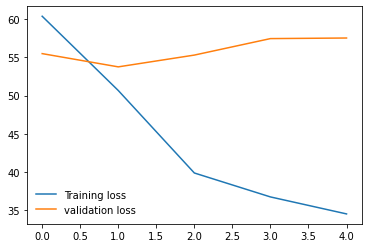

In [40]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)
plt.savefig('trainLossVsValidationLoss.pdf')

# Testing

In [ ]:
model.load_state_dict(torch.load("./news_model1.pth", map_location = device))

<All keys matched successfully>

In [ ]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [ ]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       579
           1       0.82      0.72      0.76      1027

    accuracy                           0.72      1606
   macro avg       0.70      0.72      0.71      1606
weighted avg       0.74      0.72      0.72      1606

